In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from talib import RSI, BBANDS, MACD

In [58]:
DATA_STORE = '../data/assets.h5'
idx = pd.IndexSlice

In [59]:
with pd.HDFStore(DATA_STORE) as store:
    data = (store['quandl/wiki/prices']
            .loc[idx['2007':'2017', 'AAPL'],
                 ['adj_open', 'adj_high', 'adj_low', 'adj_close', 'adj_volume']]
            .unstack('ticker')
            .swaplevel(axis=1)
            .loc[:, 'AAPL']
            .rename(columns=lambda x: x.replace('adj_', '')))

In [60]:
data

,open,high,low,close,volume
date,,,,,
2007-01-03,11.089468,11.126737,10.525291,10.769468,309579900.0
2007-01-04,10.801596,11.045773,10.772038,11.008504,211815100.0
2007-01-05,11.022640,11.077901,10.846576,10.930110,208685400.0
2007-01-08,11.047058,11.120311,10.959669,10.984086,199276700.0
2007-01-09,11.110030,11.949226,10.942962,11.896535,837324600.0
...,...,...,...,...,...
2017-12-22,174.680000,175.424000,174.500000,175.010000,16052615.0
2017-12-26,170.800000,171.470000,169.679000,170.570000,32968167.0
2017-12-27,170.100000,170.780000,169.710000,170.600000,21672062.0


In [61]:
up, mid, low = BBANDS(data.close, timeperiod=21, nbdevup=2, nbdevdn=2, matype=0)

In [62]:
rsi = RSI(data.close, timeperiod=14)
rsi

date
2007-01-03          NaN
2007-01-04          NaN
2007-01-05          NaN
2007-01-08          NaN
2007-01-09          NaN
                ...    
2017-12-22    60.506090
2017-12-26    46.831972
2017-12-27    46.919262
2017-12-28    48.379541
2017-12-29    43.421408
Length: 2767, dtype: float64

In [63]:
macd, macdsignal, macdhist = MACD(data.close, fastperiod=12, slowperiod=26, signalperiod=9)
macdsignal

date
2007-01-03         NaN
2007-01-04         NaN
2007-01-05         NaN
2007-01-08         NaN
2007-01-09         NaN
                ...   
2017-12-22    1.507034
2017-12-26    1.459293
2017-12-27    1.362332
2017-12-28    1.244158
2017-12-29    1.086530
Length: 2767, dtype: float64

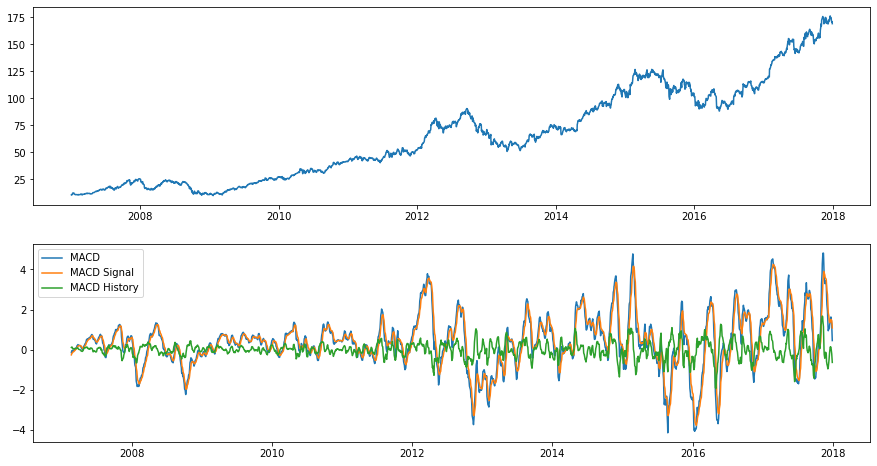

In [76]:
plt.figure(figsize=(15, 8))
plt.subplot(2,1,1)
plt.plot(data.close)
plt.subplot(2, 1, 2)
plt.plot(macd,label = "MACD")
plt.plot(macdsignal,label = "MACD Signal")
plt.plot(macdhist, label = "MACD History")
plt.legend()

In [78]:
data = pd.DataFrame({'AAPL': data.close, 'BB Up': up, 'BB Mid': mid, 'BB down': low, 'RSI': rsi, 'MACD': macd})

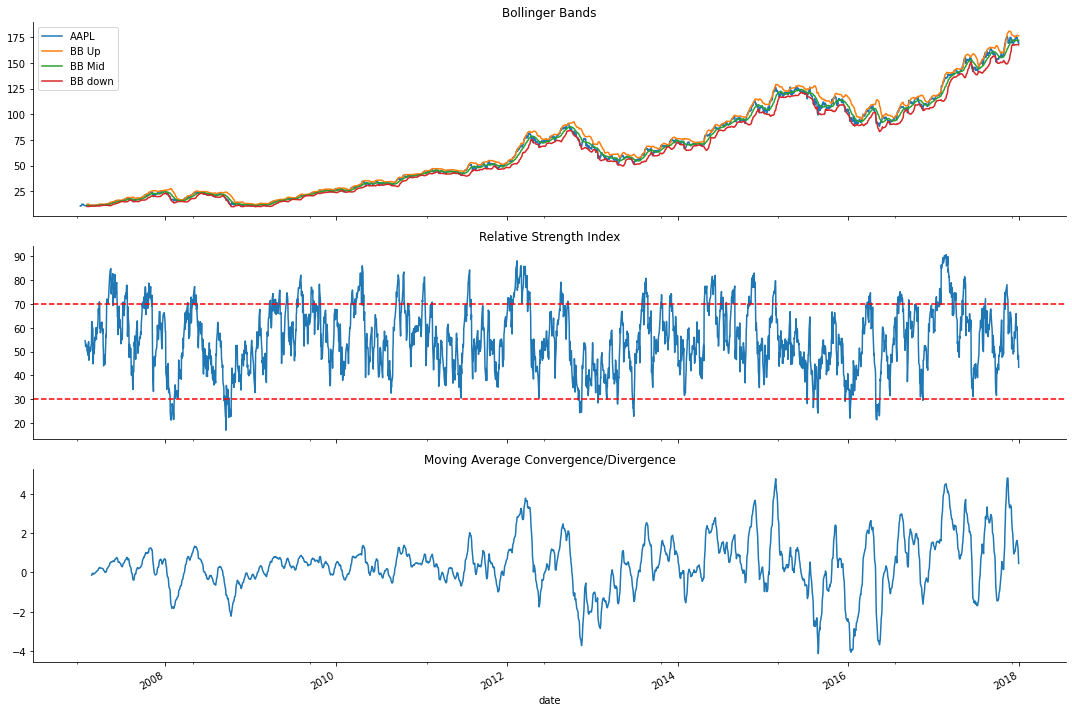

In [88]:
fig, axes= plt.subplots(nrows=3, figsize=(15, 10), sharex=True)
data.drop(['RSI', 'MACD'], axis=1).plot(ax=axes[0], title='Bollinger Bands')
data['RSI'].plot(ax=axes[1], title='Relative Strength Index')
axes[1].axhline(70, ls='--', c='r')
axes[1].axhline(30, ls='--', c='r')
data.MACD.plot(ax=axes[2], title='Moving Average Convergence/Divergence')
fig.tight_layout()
sns.despine();